In [3]:
#So, in this part, I am going to look at Pitchers, their teams and compare it to their salary to see any correlation 
#As of now I have looked at the data of 14 + pitchers using scatterplot, lin regression

#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
data_salary = "archive/Salaries.csv"

reading_data_salary = pd.read_csv(data_salary)
reading_data_salary.head(15)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [4]:
#salary
salaries_data = pd.read_csv(data_salary)
filter_salary = salaries_data.loc[salaries_data['yearID'] > 1999]
#now it show info from 2000 onwards
filter_salary.head(10)

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
12268,2000,ANA,AL,davanje02,200000
12269,2000,ANA,AL,dicksja01,375000
12270,2000,ANA,AL,disarga01,3225000
12271,2000,ANA,AL,erstada01,2500000
12272,2000,ANA,AL,fyhrimi01,210000


In [5]:
#pitching
data_pitching = "archive/Pitching.csv"
pitching_data = pd.read_csv(data_pitching)
pitching_data

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [6]:
pitching_dataframe = pd.read_csv(data_pitching)
filter_pitching = pitching_dataframe.loc[pitching_dataframe['yearID']> 1999]
#now it show info from 2000 onwards
filter_pitching.head(25)


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
32900,abbotpa01,2000,1,SEA,AL,9,7,35,27,0,...,4.0,3.0,5.0,0,766.0,2.0,89,1.0,4.0,NaN
32901,aceveju01,2000,1,MIL,NL,3,7,62,0,0,...,9.0,3.0,1.0,2,347.0,18.0,38,1.0,1.0,NaN
32902,adamste01,2000,1,LAN,NL,6,9,66,0,0,...,0.0,5.0,0.0,0,369.0,18.0,42,3.0,0.0,NaN
32903,aguilri01,2000,1,CHN,NL,1,2,54,0,0,...,2.0,1.0,4.0,0,210.0,44.0,28,1.0,0.0,NaN
32904,aldresc01,2000,1,PHI,NL,1,3,23,0,0,...,0.0,1.0,1.0,0,95.0,5.0,14,1.0,2.0,NaN
32905,alfonan01,2000,1,FLO,NL,5,6,68,0,0,...,3.0,0.0,1.0,2,311.0,62.0,35,3.0,1.0,NaN
32906,almanar01,2000,1,FLO,NL,4,2,67,0,0,...,6.0,1.0,2.0,0,216.0,8.0,27,2.0,2.0,NaN
32907,almanca01,2000,1,SDN,NL,4,5,62,0,0,...,2.0,2.0,4.0,0,308.0,11.0,35,2.0,3.0,NaN
32908,alvarju01,2000,1,ANA,AL,0,0,11,0,0,...,1.0,1.0,0.0,0,38.0,3.0,9,0.0,1.0,NaN
32909,anderbr02,2000,1,ARI,NL,11,7,33,32,2,...,7.0,1.0,3.0,4,876.0,0.0,101,6.0,6.0,NaN


In [7]:
#this df has the columns with important filtered components
pitching_df = filter_pitching[['playerID', 'yearID', 'teamID', 'G', 'W', 'L']]
pitching_df.head(10)


,playerID,yearID,teamID,G,W,L
32900,abbotpa01,2000,SEA,35,9,7
32901,aceveju01,2000,MIL,62,3,7
32902,adamste01,2000,LAN,66,6,9
32903,aguilri01,2000,CHN,54,1,2
32904,aldresc01,2000,PHI,23,1,3
32905,alfonan01,2000,FLO,68,5,6
32906,almanar01,2000,FLO,67,4,2
32907,almanca01,2000,SDN,62,4,5
32908,alvarju01,2000,ANA,11,0,0
32909,anderbr02,2000,ARI,33,11,7


In [8]:
#to get average  number of players
#avg_players = filter_pitching.groupby(by=['yearID', 'teamID'])['playerID'].count()
#group_df = pd.DataFrame(avg_players,columns = ['playerID', 'yearID', 'teamID', 'G', 'W', 'L'])
#group_df 


In [9]:
#pitching
#group_df = filter_salary[['playerID', 'yearID', 'teamID']].groupby(['yearID', 'teamID', 'G', 'W', 'L']).count().reset_index()
#group_df

In [10]:
#roup_df['Player_Average']= group_df.apply(lambda row: avg_players(group_df, row.playerID, row.yearID), axis = 1)
#group_df.head

In [11]:
#to get sum
salaries_sum = filter_salary.groupby(by=['yearID', 'teamID'])['salary'].sum()
grouped_df = pd.DataFrame(salaries_sum,columns = ['playerID','yearID', 'teamID', 'salary'])
grouped_df 


playerID yearID teamID     salary
yearID teamID                                  
2000   ANA         NaN    NaN    NaN   51464167
       ARI         NaN    NaN    NaN   81027833
       ATL         NaN    NaN    NaN   84537836
       BAL         NaN    NaN    NaN   81447435
       BOS         NaN    NaN    NaN   77940333
...                ...    ...    ...        ...
2015   SLN         NaN    NaN    NaN  119241500
       TBA         NaN    NaN    NaN   64521233
       TEX         NaN    NaN    NaN  143742789
       TOR         NaN    NaN    NaN  112992400
       WAS         NaN    NaN    NaN  155587472

[480 rows x 4 columns]

In [12]:
grouped_df = filter_salary[['playerID','yearID','teamID','salary']].groupby(['playerID','yearID','teamID']).sum().reset_index()
grouped_df.head()

,playerID,yearID,teamID,salary
0,aardsda01,2004,SFN,300000
1,aardsda01,2007,CHA,387500
2,aardsda01,2008,BOS,403250
3,aardsda01,2009,SEA,419000
4,aardsda01,2010,SEA,2750000


In [13]:
def std_salary(grouped_df, year, salary):
    return (salary-(grouped_df[(grouped_df['yearID']==year)]['salary'].mean()))/(grouped_df[(grouped_df['yearID']==year)]['salary'].std())

In [14]:
#groupeddf
grouped_df['Salary_Std']= grouped_df.apply(lambda row: std_salary(grouped_df, row.yearID, row.salary), axis = 1)
grouped_df.head()

,playerID,yearID,teamID,salary,Salary_Std
0,aardsda01,2004,SFN,300000,-0.618243
1,aardsda01,2007,CHA,387500,-0.670224
2,aardsda01,2008,BOS,403250,-0.651822
3,aardsda01,2009,SEA,419000,-0.653900
4,aardsda01,2010,SEA,2750000,-0.118521


In [15]:
#to get percentage of wins
   #- do wins/games*100

#Getting error----  .loc[row_indexer,col_indexer] = value

#pitching_df['percentage_of_wins'] = pitching_df.loc['teamID']['W']??

pitching_df['x'] = pitching_df.groupby(['teamID'])['W'].cumsum()
pitching_df['y'] = pitching_df.groupby(['teamID'])['G'].cumsum()
pitching_df['percentage_of_wins'] = pitching_df['x'] / pitching_df['y'] * 100


/Users/sherinm/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sherinm/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/sherinm/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [16]:
#to get percentage of loss, do loss/games

#Getting error- use .loc[row_indexer,col_indexer] = value
#pitching_df['percentage_of_loss'] = pitching_df.loc['W']['G']??

#pitching_df['x'] = pitching_df.groupby(['teamID'])['W'].cumsum()
#pitching_df['y'] = pitching_df.groupby(['teamID'])['G'].cumsum()
#pitching_df['percentage_of_loss'] = pitching_df['x'] / pitching_df['y'] * 100



In [17]:
#to merge datas here
pitching_and_salaries = grouped_df.merge(pitching_df, on=['playerID','yearID','teamID'])
pitching_and_salaries.head()

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
0,aardsda01,2004,SFN,300000,-0.618243,11,1,0,383,2359,16.235693
1,aardsda01,2007,CHA,387500,-0.670224,25,2,1,619,4024,15.382704
2,aardsda01,2008,BOS,403250,-0.651822,47,4,2,734,4750,15.452632
3,aardsda01,2009,SEA,419000,-0.653900,73,3,6,755,5215,14.477469
4,aardsda01,2010,SEA,2750000,-0.118521,53,0,6,837,5767,14.513612


In [18]:
#pitcher David Aardsma's stats
Pitcher_David_Aardsma = pitching_and_salaries[(pitching_and_salaries['playerID']== 'aardsda01')]
Pitcher_David_Aardsma

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
0,aardsda01,2004,SFN,300000,-0.618243,11,1,0,383,2359,16.235693
1,aardsda01,2007,CHA,387500,-0.670224,25,2,1,619,4024,15.382704
2,aardsda01,2008,BOS,403250,-0.651822,47,4,2,734,4750,15.452632
3,aardsda01,2009,SEA,419000,-0.653900,73,3,6,755,5215,14.477469
4,aardsda01,2010,SEA,2750000,-0.118521,53,0,6,837,5767,14.513612
5,aardsda01,2012,NYA,500000,-0.628073,1,0,0,1157,7084,16.332580


In [19]:
#Pitch

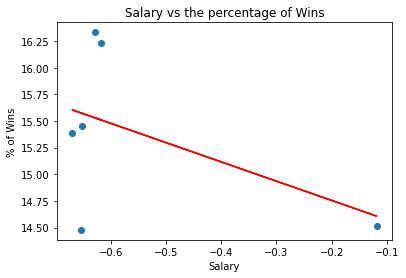

In [20]:
##Pitcher_David_Aardsma: correlation and linear regression
# there is a negative correlation

x_val= Pitcher_David_Aardsma['Salary_Std']
y_val = Pitcher_David_Aardsma['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title('Salary vs the percentage of Wins')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [21]:
#pitcher Barry Zito's stats
pitcher_barry_zito = pitching_and_salaries[(pitching_and_salaries['playerID']== 'zitoba01')]
pitcher_barry_zito

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
6199,zitoba01,2001,OAK,240000,-0.701528,35,17,8,193,1120,17.232143
6200,zitoba01,2002,OAK,295000,-0.683147,35,23,5,296,1690,17.514793
6201,zitoba01,2003,OAK,1000000,-0.451895,35,14,12,392,2216,17.689531
6202,zitoba01,2004,OAK,3000000,0.143357,34,11,11,483,2792,17.299427
6203,zitoba01,2005,OAK,5600000,0.816759,35,14,13,571,3364,16.973841
6204,zitoba01,2006,OAK,7900000,1.340647,34,16,10,664,3970,16.725441
6205,zitoba01,2007,SFN,10000000,1.852363,34,11,13,695,4961,14.009272
6206,zitoba01,2008,SFN,14500000,2.709934,32,10,17,767,5601,13.693983
6207,zitoba01,2009,SFN,18500000,3.482031,33,10,13,855,6220,13.745981
6208,zitoba01,2010,SFN,18500000,3.411927,34,9,14,947,6858,13.808691


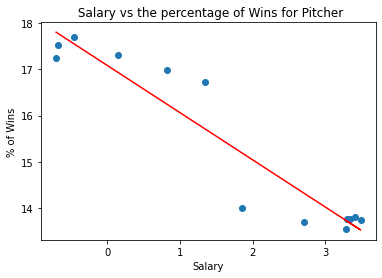

In [63]:
##Pitcher_barry: analysing correlation and linear regression
#there is a negative correlation

x_val= pitcher_barry_zito['Salary_Std']
y_val = pitcher_barry_zito['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [23]:
pitcher_jordan_zimmerman = pitching_and_salaries[(pitching_and_salaries['playerID']== 'zimmejo02')]
pitcher_jordan_zimmerman

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
6194,zimmejo02,2011,WAS,415000,-0.639451,26,8,11,492,4753,10.351357
6195,zimmejo02,2012,WAS,2300000,-0.245933,32,12,8,590,5397,10.931999
6196,zimmejo02,2013,WAS,5350000,0.327706,32,19,9,676,5999,11.268545
6197,zimmejo02,2014,WAS,7500000,0.682701,32,14,5,772,6619,11.663393
6198,zimmejo02,2015,WAS,16500000,2.215461,33,13,10,855,7249,11.794730


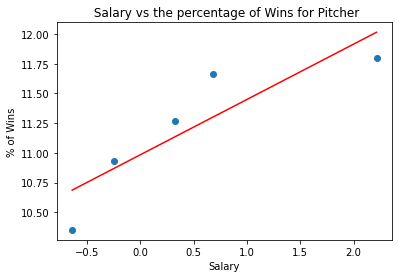

In [64]:
##Pitcher_jordan_zimmerman: analysing correlation and linear regression
#there is a positive correlation

x_val= pitcher_jordan_zimmerman['Salary_Std']
y_val = pitcher_jordan_zimmerman['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [25]:
#pitcher_tony_zych = pitching_and_salaries[(pitching_and_salaries['playerID']== 'zychto01')]
#pitcher_tony_zych

In [26]:
#pitcher tony : correlation and linear regression

#x_val= pitcher_tony_zych['Salary_Std']
#y_val = pitcher_tony_zych['percentage_of_wins']

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
#regress_val = x_val* slope + intercept
#this line equation:
#line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
#plt.scatter(x_val,y_val)
#plt.plot(x_val,regress_val,"r-")
#these are the labels
#plt.title('Salary vs the percentage of Wins for Pitcher Tony Zych)')
#plt.xlabel('Salary')
#plt.ylabel('% of Wins')
#now we show the results
#plt.show()

In [66]:
#boston
pitcher_clay_buchholz = pitching_and_salaries[(pitching_and_salaries['playerID']== 'buchhcl01')]
pitcher_clay_buchholz

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
641,buchhcl01,2008,BOS,396000,-0.653551,16,2,9,749,4794,15.623696
642,buchhcl01,2010,BOS,443000,-0.635648,28,17,7,946,6137,15.414698
643,buchhcl01,2011,BOS,555000,-0.608622,14,6,3,1046,6825,15.326007
644,buchhcl01,2012,BOS,3750000,0.061902,29,11,8,1129,7433,15.189022
645,buchhcl01,2013,BOS,5750000,0.408289,16,12,1,1194,7966,14.988702
646,buchhcl01,2014,BOS,7700000,0.721495,28,8,11,1275,8600,14.825581
647,buchhcl01,2015,BOS,12000000,1.398197,18,7,7,1346,9186,14.652732


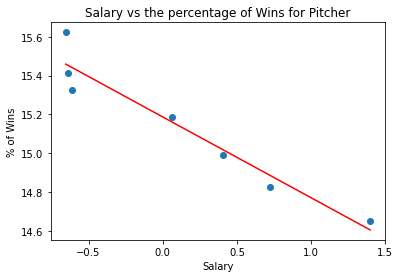

In [67]:
#pitcher clay : correlation and linear regression
# there is a somewhat positive correlation

x_val= pitcher_clay_buchholz['Salary_Std']
y_val = pitcher_clay_buchholz['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [29]:
#pitcher_justin_thomas = pitching_and_salaries[(pitching_and_salaries['playerID']== 'thomaju01')]
#pitcher_justin_thomas

In [30]:
#boston
pitcher_zach_stewart = pitching_and_salaries[(pitching_and_salaries['playerID']== 'stewaza01')]
pitcher_zach_stewart                                            

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
5291,stewaza01,2012,CHA,481500,-0.632001,18,1,2,1105,7495,14.743162


In [31]:
pitcher_vicente_padilla = pitching_and_salaries[(pitching_and_salaries['playerID']== 'padilvi01')]
pitcher_vicente_padilla 

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
4056,padilvi01,2001,PHI,230000,-0.704967,23,3,1,117,1011,11.572700
4057,padilvi01,2002,PHI,245000,-0.699432,32,14,11,199,1566,12.707535
4058,padilvi01,2003,PHI,425000,-0.617033,32,14,12,292,2170,13.456221
4059,padilvi01,2004,PHI,2600000,0.030527,20,7,7,386,2825,13.663717
4060,padilvi01,2005,PHI,3200000,0.155899,27,9,12,473,3467,13.642919
4061,padilvi01,2006,TEX,4410000,0.416972,33,15,10,520,4231,12.290239
4062,padilvi01,2007,TEX,9000000,1.589936,23,6,10,588,4816,12.209302
4063,padilvi01,2008,TEX,11000000,1.875263,29,14,8,672,5406,12.430633
4064,padilvi01,2009,TEX,12000000,1.995191,18,8,6,771,6112,12.614529
4065,padilvi01,2010,LAN,5025000,0.391432,16,6,5,932,6560,14.207317


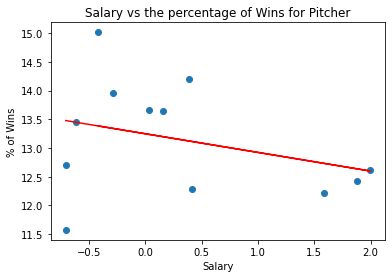

In [68]:
#pitcher pitcher_vicente_padilla : correlation and linear regression
#there is a positive correlation

x_val= pitcher_vicente_padilla['Salary_Std']
y_val = pitcher_vicente_padilla['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [69]:
pitcher_clayton_mortensen = pitching_and_salaries[(pitching_and_salaries['playerID']== 'mortecl01')]
pitcher_clayton_mortensen


,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
3685,mortecl01,2013,BOS,504500,-0.648467,24,1,2,1242,8197,15.151885


In [70]:
pitcher_mark_melancon = pitching_and_salaries[(pitching_and_salaries['playerID']== 'melanma01')]
pitcher_mark_melancon

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
3498,melanma01,2011,HOU,421000,-0.638130,71,8,4,934,7404,12.614803
3499,melanma01,2012,BOS,521000,-0.623615,41,0,2,1156,7600,15.210526
3500,melanma01,2013,PIT,521000,-0.645143,72,3,2,956,8701,10.987243
3501,melanma01,2014,PIT,2595000,-0.268740,72,3,5,1025,9274,11.052405
3502,melanma01,2015,PIT,5400000,0.199544,78,3,2,1149,10032,11.453349


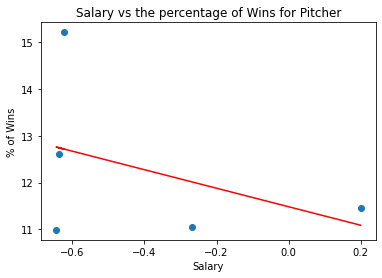

In [71]:
#pitcher pitcher_mark_melancon : correlation and linear regression
#there is a negative correlation

x_val= pitcher_mark_melancon['Salary_Std']
y_val = pitcher_mark_melancon['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [36]:
pitcher_john_lester = pitching_and_salaries[(pitching_and_salaries['playerID']== 'lestejo01')]
pitcher_john_lester

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
2924,lestejo01,2007,BOS,384000,-0.671142,12,4,0,670,4246,15.779557
2925,lestejo01,2008,BOS,421500,-0.647470,33,16,6,776,4958,15.651472
2926,lestejo01,2009,BOS,1000000,-0.520999,32,15,8,873,5560,15.701439
2927,lestejo01,2010,BOS,3750000,0.105634,32,19,9,985,6279,15.687211
2928,lestejo01,2011,BOS,5750000,0.535364,31,15,9,1075,6931,15.510027
2929,lestejo01,2012,BOS,7625000,0.884566,33,9,14,1155,7547,15.304094
2930,lestejo01,2013,BOS,11625000,1.591865,33,15,8,1238,8116,15.253820
2931,lestejo01,2014,BOS,13000000,1.749556,21,10,7,1309,8755,14.951456
2932,lestejo01,2015,CHN,20000000,2.851111,32,11,12,1216,9787,12.424645


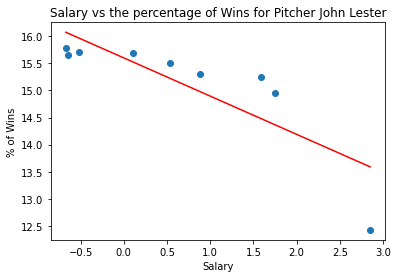

In [37]:
#pitcher pitcher_mark_melancon : correlation and linear regression
#there is a negative correlation

x_val= pitcher_john_lester['Salary_Std']
y_val= pitcher_john_lester['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher John Lester')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [38]:
pitcher_rich_hill = pitching_and_salaries[(pitching_and_salaries['playerID']== 'hillri01')]
pitcher_rich_hill

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
2376,hillri01,2007,CHN,400000,-0.666943,32,11,8,558,4485,12.441472
2377,hillri01,2008,CHN,445000,-0.641866,5,1,0,661,5107,12.943019
2378,hillri01,2009,BAL,445000,-0.647953,14,3,3,684,5818,11.756617
2379,hillri01,2012,BOS,725000,-0.580306,25,1,0,1146,7514,15.251530
2380,hillri01,2013,CLE,1000000,-0.548644,63,1,2,1045,8110,12.885327


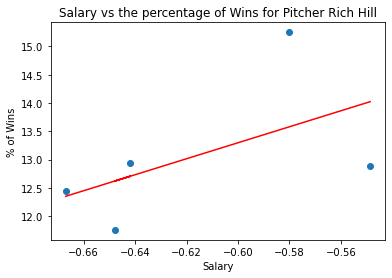

In [39]:
#pitcher rich_hill : correlation and linear regression
#there is a neg correlation

x_val= pitcher_rich_hill['Salary_Std']
y_val= pitcher_rich_hill['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher Rich Hill')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [40]:
pitcher_matt_albers = pitching_and_salaries[(pitching_and_salaries['playerID']== 'alberma01')]
pitcher_matt_albers

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
66,alberma01,2008,BAL,395000,-0.653790,28,3,3,569,4833,11.773226
67,alberma01,2009,BAL,410000,-0.655959,56,3,6,637,5514,11.552412
68,alberma01,2010,BAL,680000,-0.582523,62,5,3,703,6166,11.401233
69,alberma01,2011,BOS,875000,-0.538155,56,4,4,1023,6672,15.332734
70,alberma01,2012,BOS,1075000,-0.506001,40,2,0,1103,7276,15.159428
71,alberma01,2013,CLE,1750000,-0.397549,56,3,1,1036,7905,13.105629
72,alberma01,2015,CHA,1500000,-0.508751,30,2,0,1247,8873,14.053871


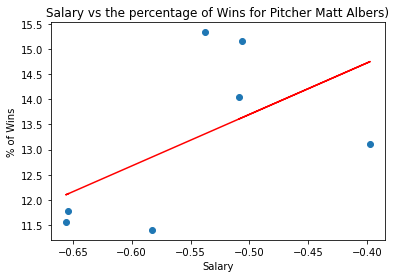

In [41]:
#pitcher_matt_albers 
#negative correlation

x_val= pitcher_matt_albers['Salary_Std']
y_val= pitcher_matt_albers['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher Matt Albers)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [42]:
pitcher_duane_richards = pitching_and_salaries[(pitching_and_salaries['playerID']== 'richadu02')]
pitcher_duane_richards

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins


In [43]:
pitcher_ramon_ramirez = pitching_and_salaries[(pitching_and_salaries['playerID']== 'ramirra02')]
pitcher_ramon_ramirez

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
4443,ramirra02,2007,COL,386000,-0.670617,22,2,2,598,5190,11.522158
4444,ramirra02,2008,KCA,397000,-0.653313,71,3,2,600,5076,11.820331
4445,ramirra02,2009,BOS,441000,-0.648868,70,7,4,901,5845,15.414885
4446,ramirra02,2010,BOS,1155000,-0.476049,44,0,3,1004,6487,15.477108
4447,ramirra02,2011,SFN,1650000,-0.367493,66,3,3,1001,7279,13.751889
4448,ramirra02,2012,NYN,2650000,-0.171628,58,3,4,1032,8075,12.780186


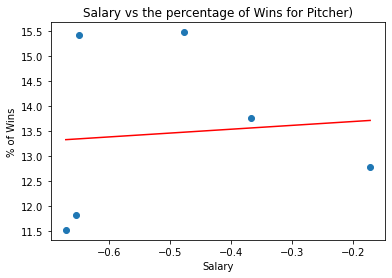

In [65]:
#pitcher_ramon_ramirez 
# negative correlation
x_val= pitcher_ramon_ramirez['Salary_Std']
y_val= pitcher_ramon_ramirez['percentage_of_wins']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#thisis  line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [45]:
pitcher_joe_nelson = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'nelsojo01')]
pitcher_joe_nelson


,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
3828,nelsojo01,2009,TBA,1300000,-0.452376,42,3,0,648,5479,11.826976


In [46]:
pitcher_manny_delcarmen = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'delcama01')]
pitcher_manny_delcarmen

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
1290,delcama01,2008,BOS,421000,-0.647590,73,1,2,758,4889,15.504193
1291,delcama01,2009,BOS,476000,-0.640862,64,5,2,858,5514,15.560392
1292,delcama01,2010,BOS,905000,-0.532088,48,3,2,949,6192,15.326227


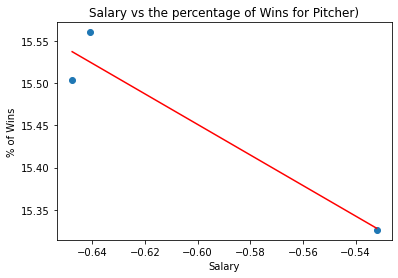

In [72]:
# pitcher manny delcarmen
# positive correlation

x_amount = pitcher_manny_delcarmen['Salary_Std']
y_amount = pitcher_manny_delcarmen['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [73]:
pitcher_robert_coello = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'coellaro01')] 
pitcher_robert_coello

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins


In [74]:
pitcher_boof_bonser =  pitching_and_salaries[(pitching_and_salaries['playerID'] == 'bonsebo01')] 
pitcher_boof_bonser 

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
524,bonsebo01,2007,MIN,397500,-0.667599,31,8,12,626,4094,15.290669
525,bonsebo01,2008,MIN,432500,-0.644847,47,3,7,716,4785,14.963427
526,bonsebo01,2010,BOS,650000,-0.589248,2,0,0,929,6095,15.242002


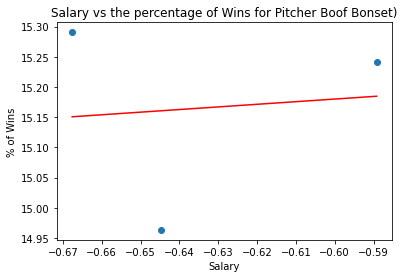

In [75]:

#pitcher_boof_bonser
#negative correlation

x_amount = pitcher_boof_bonser['Salary_Std']
y_amount = pitcher_boof_bonser['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher Boof Bonset)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [76]:
pitcher_daniel_bard = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'bardda01')] 
pitcher_daniel_bard

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
283,bardda01,2010,BOS,415500,-0.641812,73,1,2,923,6072,15.200922
284,bardda01,2011,BOS,505000,-0.619633,70,2,9,1026,6759,15.179760
285,bardda01,2012,BOS,1612500,-0.391889,17,5,6,1111,7354,15.107425
286,bardda01,2013,BOS,1862500,-0.374885,2,0,0,1175,7861,14.947208


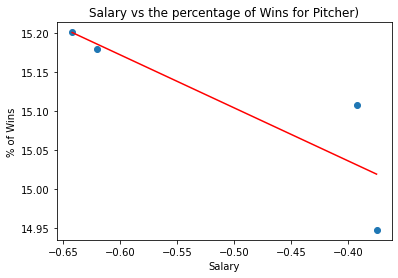

In [78]:
#pitcher daniel bard
#positive correlation

x_amount = pitcher_daniel_bard['Salary_Std']
y_amount = pitcher_daniel_bard['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [79]:
pitcher_john_smoltz = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'smoltjo01')] 
pitcher_john_smoltz

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
5171,smoltjo01,2001,ATL,8000000,1.967238,36,3,3,182,1084,16.789668
5172,smoltjo01,2002,ATL,7666667,1.717744,75,3,2,283,1690,16.745562
5173,smoltjo01,2003,ATL,10666667,2.324332,62,0,2,384,2381,16.127677
5174,smoltjo01,2004,ATL,11666667,2.587997,73,0,1,452,2972,15.208614
5175,smoltjo01,2005,ATL,9000000,1.752978,33,14,7,553,3615,15.297372
5176,smoltjo01,2006,ATL,11000000,2.161103,35,16,9,634,4177,15.178358
5177,smoltjo01,2007,ATL,8000000,1.327508,32,14,8,724,4811,15.048846
5178,smoltjo01,2008,ATL,14000000,2.590695,6,3,2,805,5708,14.103013
5179,smoltjo01,2009,BOS,5500000,0.508351,8,2,5,906,5912,15.324763


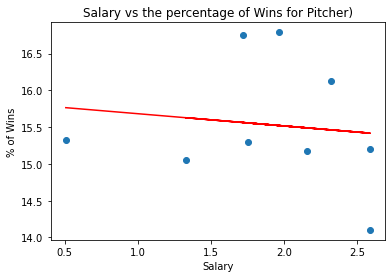

In [80]:
#pitcher_john_smoltz
#negative correlation

x_amount = pitcher_john_smoltz['Salary_Std']
y_amount = pitcher_john_smoltz['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [81]:
#pitcher boston
pitcher_brad_penny = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'pennybr01')] 
pitcher_brad_penny


,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
4187,pennybr01,2000,FLO,200000,-0.712266,23,8,7,63,521,12.092131
4188,pennybr01,2001,FLO,260000,-0.694650,31,10,10,148,1143,12.948381
4189,pennybr01,2002,FLO,377500,-0.656278,24,8,7,214,1716,12.470862
4190,pennybr01,2003,FLO,1875000,-0.200599,32,14,10,287,2161,13.280888
4191,pennybr01,2004,FLO,3725000,0.347860,21,8,8,380,2741,13.863553
4192,pennybr01,2005,LAN,5100000,0.679080,29,7,9,485,3300,14.696970
4193,pennybr01,2006,LAN,5250000,0.639289,34,16,9,572,3956,14.459050
4194,pennybr01,2007,LAN,7750000,1.261901,33,16,4,655,4526,14.471940
4195,pennybr01,2008,LAN,9250000,1.457928,19,6,9,756,5230,14.455067
4196,pennybr01,2009,BOS,5000000,0.393979,24,7,8,894,5775,15.480519


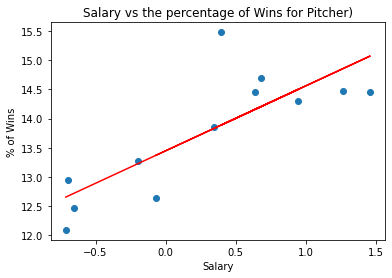

In [83]:
#pitcher brad penny
# there is a somewhat correlation

x_amount = pitcher_brad_penny['Salary_Std']
y_amount = pitcher_brad_penny['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)

#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')

#display the results below

plt.show()

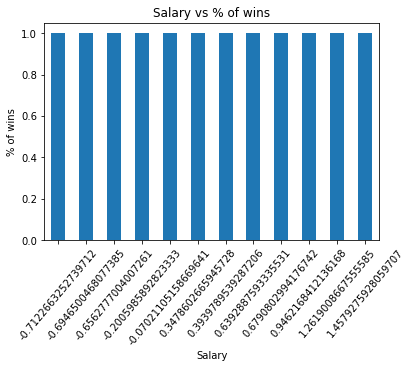

<Figure size 432x288 with 0 Axes>

In [57]:
# Brad Penny barplot

barplot_data = pitcher_brad_penny.groupby('Salary_Std').count()['percentage_of_wins']
barplot_df= pd.DataFrame(barplot_data)
plt.xdata = barplot_df.plot.bar(legend = False, rot = 50, align ='center')
#label
plt.title('Salary vs % of wins')
plt.xlabel('Salary')
plt.ylabel('% of wins')

#show results
plt.show()
plt.tight_layout()


In [58]:
#pitcher aba alvarez
pitcher_aba_alvarez = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'alvarab01')]
pitcher_aba_alvarez 
#no data?

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins


In [59]:
#pitcher bryan corey
pitcher_bryan_corey = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'coreybr01')]
pitcher_bryan_corey
#not enough data

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
1109,coreybr01,2008,BOS,405000,-0.651405,7,0,0,757,4816,15.718439


In [60]:
#rudy seanez
pitcher_rudy_seanez = pitching_and_salaries[(pitching_and_salaries['playerID'] == 'seaneru01')]
pitcher_rudy_seanez


,playerID,yearID,teamID,salary,Salary_Std,G,W,L,x,y,percentage_of_wins
5030,seaneru01,2000,ATL,1650000,-0.136251,23,2,4,95,523,18.164436
5031,seaneru01,2002,TEX,1000000,-0.453535,33,1,3,205,1691,12.123004
5032,seaneru01,2005,SDN,550000,-0.573800,57,7,1,441,3617,12.192425
5033,seaneru01,2006,BOS,1900000,-0.247333,41,2,1,609,3907,15.587407
5034,seaneru01,2007,LAN,700000,-0.588215,73,6,3,667,4699,14.194509


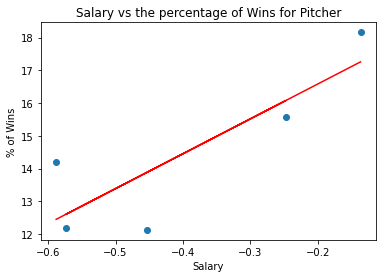

In [84]:
#pitcher rudy seanez
#there is a negative correlation
x_amount = pitcher_rudy_seanez['Salary_Std']
y_amount = pitcher_rudy_seanez['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_amount, y_amount)

#this is regression value equation
regress_val = x_amount* slope + intercept
#this is the line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)

#we create a scatterplot
plt.scatter(x_amount,y_amount)
plt.plot(x_amount,regress_val,"r-")

#these are the labels
plt.title('Salary vs the percentage of Wins for Pitcher')
plt.xlabel('Salary')
plt.ylabel('% of Wins')

#display the results below
plt.show()

In [62]:
#Conclusions that I can draw from the graphs above

#So,10 out of the 16 pitchers, had a negative correlation with salary vs percentage of times the pitcher wins in games. 
#Salary doesn't necessarily  affect the pitchers chances of winning? Pitching wins and salary doesn't seem to have a 
#huge correlation
# But the sample size is also small so I can't make any generalizations
#all pitchers in dataframe, vs average salary
 